## MOD1 Project: Microsoft Streaming Platform

* Student name: Attila D Gogos
* Student pace: online-ds-pt-030220
* Scheduled project review date/time: April 28, 2020 @ 9:30am PST
* Instructor name: Eli Thomas
* Blog post URL: 


#### Objective:
###### Peform a data analysis on how different type of movies are performing, therefore providing a recommendation to the client/studio on what movies that might consider creating.

###### Our main questions we will be asking:
###### 1. What is the most produced MPAA Ratinga category since the early 2000s?
###### 2. Which Genre has the most profit?
###### 3. When are most movies released?
###### 4. Which Genres have the best rating score and rating count?

In [182]:
#input first wave of dependencies
#for multidimensional arrays like DataFrames and Series
#for easy calculations of numerical data

import pandas as pd
import numpy as np 
import statistics

In [183]:
#import the excel from data.world
orig_dataset = pd.read_excel('https://query.data.world/s/gbgavrlgern5guuyq5yd5tkp4amzl3')    

In [184]:
#remove the MovieID column (unnecessary)

orig_dataset.drop('MovieID', axis=1, inplace=True)

In [185]:
#show the top 5 values

orig_dataset.head()

,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,93.0,5.9,73638.0,"After a single, career-minded woman is left on..."
1,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0,An old Jewish woman and her African-American c...
2,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,100.0,7.2,91415.0,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,145.0,7.2,91415.0,The biography of Ron Kovic. Paralyzed in the V...
4,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,107.0,7.5,101702.0,"An Iowa corn farmer, hearing voices, interpret..."


In [186]:
#create a new dataframe that drops every NaN and NaT value
#and sorts by release date (latest to oldest movie)
#includes 250 movies

df = orig_dataset.dropna().sort_values(by = ['Release Date'], ascending=False).head(250)

In [187]:
#create a new index
df.reset_index(inplace=True, drop=True)

In [188]:
df

#lets see what we get

,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,American Sniper,R,58800000.0,542307423.0,2014-12-11,War,133.0,7.3,409597.0,Navy S.E.A.L. sniper Chris Kyles (Bradley Coop...
1,The Hunger Games: Mockingjay - Part 1,PG-13,125000000.0,752100229.0,2014-11-18,Adventure,123.0,6.6,386742.0,Katniss Everdeen is in District 13 after she s...
2,Interstellar,PG-13,165000000.0,675120017.0,2014-11-05,Science Fiction,169.0,8.6,1343549.0,A team of explorers travel through a wormhole ...
3,Big Hero 6,PG,165000000.0,652105443.0,2014-10-24,Animation,102.0,7.8,380953.0,The special bond that develops between plus-si...
4,Gone Girl,R,61000000.0,369330363.0,2014-10-01,Thriller,145.0,8.1,782252.0,With his wifes disappearance having become the...
...,...,...,...,...,...,...,...,...,...,...
245,"Monsters, Inc.",G,115000000.0,562816256.0,2001-11-01,Comedy,92.0,8.0,758349.0,"In order to power the city, monsters have to s..."
246,American Pie 2,R,30000000.0,287553595.0,2001-08-10,Comedy,108.0,6.4,228537.0,"Jim and his friends are now in college, and th..."
247,Rush Hour 2,PG-13,90000000.0,347325802.0,2001-08-03,Comedy,90.0,6.6,188755.0,Carter and Lee head to Hong Kong for a vacatio...
248,The Princess Diaries,G,37000000.0,165335153.0,2001-08-03,Romance,115.0,6.3,118754.0,Mia Thermopolis has just found out that she is...


In [189]:
#Need to create a Profit column using Gross and Budget 
#and also create a day of the week column, a year column, and quater column

df['Profit'] = df['Gross'] - df['Budget']
df['Day of Week'] = df['Release Date'].dt.day_name()
df['Year'] = df['Release Date'].dt.year
df['Quarter'] = df['Release Date'].dt.quarter 

In [202]:
#Let's see out updated DataFrame

df.head()

,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary,Profit,Day of Week,Year,Quarter
0,American Sniper,R,58800000.0,542307423.0,2014-12-11,War,133.0,7.3,409597.0,Navy S.E.A.L. sniper Chris Kyles (Bradley Coop...,483507423.0,Thursday,2014,4
1,The Hunger Games: Mockingjay - Part 1,PG-13,125000000.0,752100229.0,2014-11-18,Adventure,123.0,6.6,386742.0,Katniss Everdeen is in District 13 after she s...,627100229.0,Tuesday,2014,4
2,Interstellar,PG-13,165000000.0,675120017.0,2014-11-05,Science Fiction,169.0,8.6,1343549.0,A team of explorers travel through a wormhole ...,510120017.0,Wednesday,2014,4
3,Big Hero 6,PG,165000000.0,652105443.0,2014-10-24,Animation,102.0,7.8,380953.0,The special bond that develops between plus-si...,487105443.0,Friday,2014,4
4,Gone Girl,R,61000000.0,369330363.0,2014-10-01,Thriller,145.0,8.1,782252.0,With his wifes disappearance having become the...,308330363.0,Wednesday,2014,4


In [191]:
#I found an outlier with a super high profit when I was sorting movies by profit and weekday
#This movie was on a Thursday

df[df['Day of Week']=='Thursday']

,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary,Profit,Day of Week,Year,Quarter
0,American Sniper,R,58800000.0,542307423.0,2014-12-11,War,133.0,7.3,409597.0,Navy S.E.A.L. sniper Chris Kyles (Bradley Coop...,483507423.0,Thursday,2014,4
5,Teenage Mutant Ninja Turtles,PG-13,125000000.0,477200000.0,2014-08-07,Action,101.0,5.8,194073.0,"When a kingpin threatens New York City, a grou...",352200000.0,Thursday,2014,3
7,Dawn of the Planet of the Apes,PG-13,170000000.0,710644566.0,2014-06-26,Science Fiction,130.0,7.6,395425.0,A growing nation of genetically evolved apes l...,540644566.0,Thursday,2014,2
8,How to Train Your Dragon 2,PG,145000000.0,609123048.0,2014-06-12,Animation,102.0,7.8,285394.0,When Hiccup and Toothless discover an ice cave...,464123048.0,Thursday,2014,2
9,22 Jump Street,R,50000000.0,188441614.0,2014-06-05,Comedy,112.0,7.0,325958.0,After making their way through high school (tw...,138441614.0,Thursday,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,The Matrix Reloaded,R,150000000.0,738599701.0,2003-05-15,Science Fiction,138.0,7.2,487328.0,"Following the events of The Matrix (1999), Neo...",588599701.0,Thursday,2003,2
223,The Santa Clause 2,G,65000000.0,172855065.0,2002-10-31,Family,104.0,5.6,45755.0,Scott Calvin has been a humble Santa Claus for...,107855065.0,Thursday,2002,4
225,Sweet Home Alabama,PG-13,30000000.0,180622424.0,2002-09-26,Romance,108.0,6.2,96978.0,A young woman whos reinvented herself as a New...,150622424.0,Thursday,2002,3
232,Minority Report,PG-13,102000000.0,358372926.0,2002-06-20,Science Fiction,145.0,7.6,477892.0,In a future where a special police unit is abl...,256372926.0,Thursday,2002,2


In [192]:
#Delete anything above 1 billion for profit

df = df[df['Profit'] <= 1000000000]

#The movie specifically was Avatar (one of the best movies ever!)

In [193]:
print(df.dtypes)

Title                   object
MPAA Rating             object
Budget                 float64
Gross                  float64
Release Date    datetime64[ns]
Genre                   object
Runtime                float64
Rating                 float64
Rating Count           float64
Summary                 object
Profit                 float64
Day of Week             object
Year                     int64
Quarter                  int64
dtype: object


In [194]:
#now we use scipy stats to convert to an array so that we can make a mean value df

arr = np.array(df['Profit'])
arr.tolist()
print(arr)

[4.83507423e+08 6.27100229e+08 5.10120017e+08 4.87105443e+08
 3.08330363e+08 3.52200000e+08 6.03328629e+08 5.40644566e+08
 4.64123048e+08 1.38441614e+08 3.69076069e+08 2.50157400e+08
 5.44766572e+08 2.03747895e+08 4.09160692e+08 2.11171807e+08
 7.08400000e+08 7.17423452e+08 4.74571402e+08 6.11392705e+08
 3.05000141e+08 1.15674180e+08 8.94761885e+08 5.43559607e+08
 3.31865000e+08 4.37845518e+08 2.46040419e+08 2.77365246e+08
 4.50178928e+08 1.38965010e+08 3.25368238e+08 7.71103568e+08
 7.09000000e+08 2.10293450e+08 3.06222889e+08 9.08561013e+08
 3.31141306e+08 2.73375603e+08 8.34939099e+08 4.99368315e+08
 5.37215857e+08 7.82244782e+08 3.53983207e+08 6.01921274e+08
 2.26600000e+08 3.99026776e+08 6.16210692e+08 2.78840316e+08
 2.67695435e+08 5.49713380e+08 2.09615000e+08 9.92721240e+07
 3.89860185e+08 4.53749323e+08 2.30569774e+08 9.28746996e+08
 3.59852396e+08 1.74455986e+08 5.15692281e+08 6.65713802e+08
 2.55883523e+08 2.99326618e+08 5.01137675e+08 3.94635760e+08
 6.02171856e+08 2.142769

In [195]:
#create a profit mean

profit_mean = statistics.mean(arr)
print(profit_mean)

367605090.2909836


In [196]:
#import seaborn and other dependencies for plotting

import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

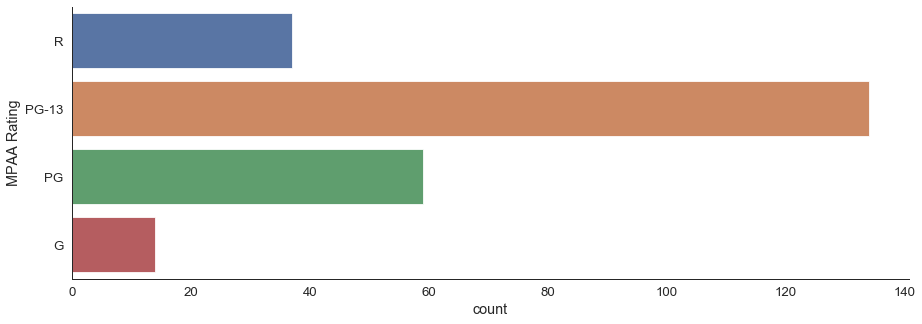

In [197]:
#bar/countplot

sns.set(style='white')
sns.set_context("paper", font_scale=1.5) 
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="MPAA Rating", data=df)
sns.despine();

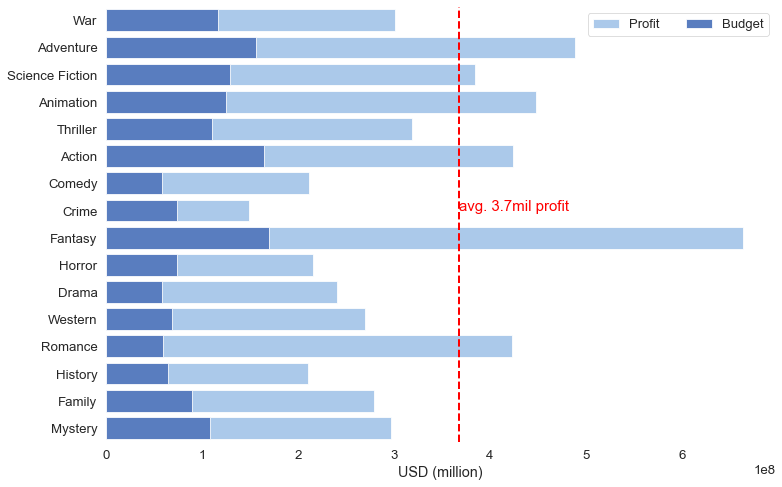

In [198]:
#Another Bar Plot, with added subplots

#Create a object for subplots and set the fig size

f, ax = plt.subplots(figsize=(12, 8))

# Plot the Profit

sns.set_color_codes("pastel")
sns.set_style('ticks')
sns.barplot(x="Profit", 
            y="Genre", 
            data=df,
            label="Profit", 
            color="b", ci=None)

# Plot the Budget

sns.set_color_codes("muted")
sns.barplot(x="Budget", 
            y="Genre", 
            data=df,
            label="Budget", 
            color="b", 
            ci=None)

#Plot a vertical 'Profit' mean with a label
 
ax.axvline(int(profit_mean), 
           color='red',
           linestyle='dashed', 
           linewidth=2.0)

plt.text(int(profit_mean), 
         7, 
         'avg. 3.7mil profit',
         fontsize='15', 
         color='red')

# Add a legend and informative axis label

ax.legend(ncol=2, 
          loc="upper right", 
          frameon=True, 
          fontsize='13')

# set labels

ax.set(xlim=int(), 
       ylabel="",
       xlabel="USD (million)")

#remove the exponent formatting on the x-axis

ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xscale('linear')

# I love plotting with no borders :)

sns.despine(left=True, bottom=True)


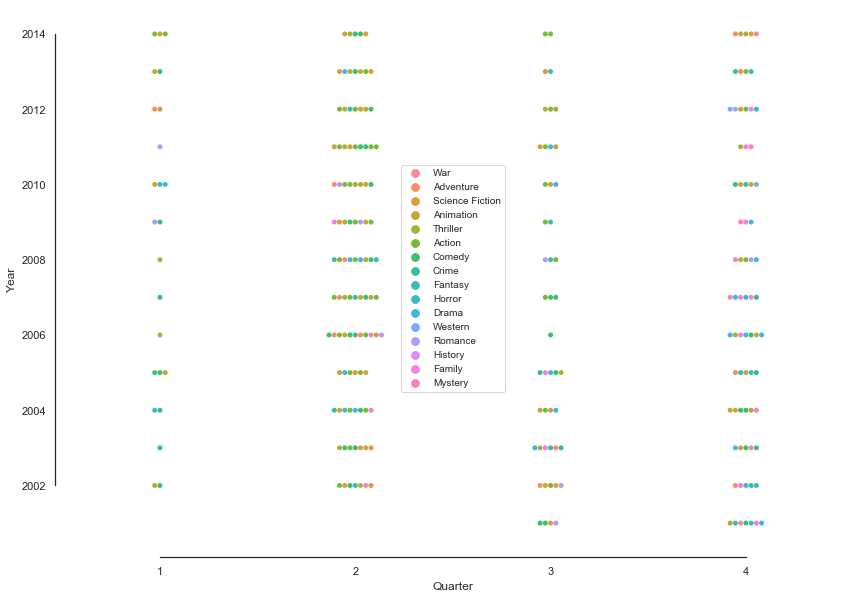

In [199]:
#swarmplot

sns.set(style='white')
f, ax = plt.subplots(figsize=(14, 10))

sns.swarmplot(x="Quarter", 
              y='Year', 
              hue="Genre",
              data=df)

sns.despine(offset=7, trim=True)

ax.legend(ncol=1, loc="center", frameon=True, fontsize='10');


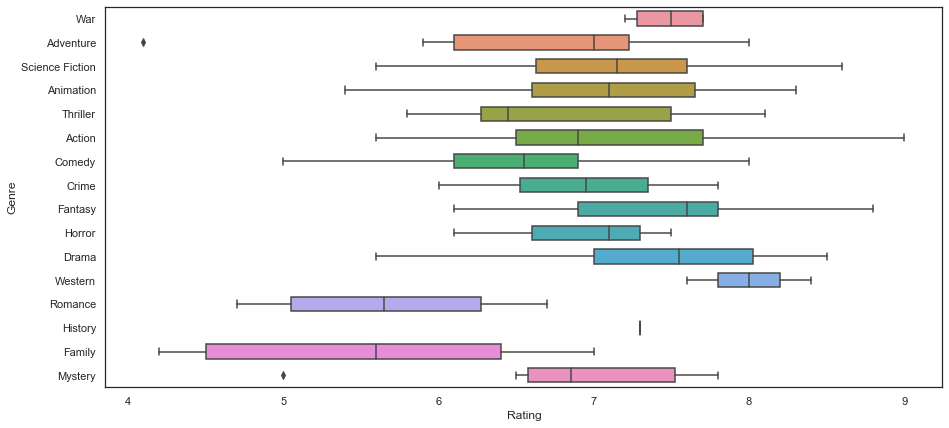

In [200]:
#Create a boxplot for Genres and Ratings

f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(y=df["Genre"], 
            x=df["Rating"],
            width=0.6
            );
plt.show()